# Exploratory analysis of distance metrics

In [8]:
# Import packages
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style 
import plotly.plotly as py
import yaml
from sklearn.preprocessing import MinMaxScaler
import itertools
from numpy.polynomial.polynomial import polyfit

with open('config_file.yaml', 'r') as f:
    config = yaml.load(f)

In [43]:
# Read dataset
df = pd.read_csv(config['ROOT_PATH'] + '/data/' + 'proposals_dists.csv', sep=',', encoding='utf-8')

## Correlation matrix

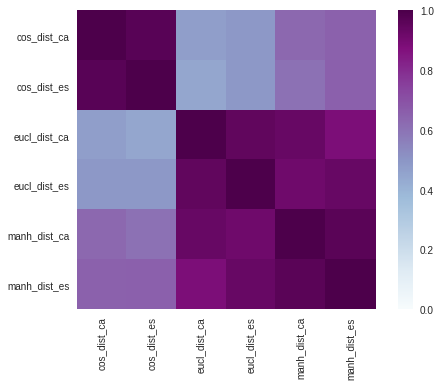

In [45]:
# Correlation matrix
dists_corr = df[['cos_dist_ca', 'cos_dist_es', 'eucl_dist_ca', 'eucl_dist_es', 'manh_dist_ca', 'manh_dist_es']]
corr = dists_corr.corr()
sns.heatmap(corr, xticklabels = corr.columns, cmap = "BuPu", yticklabels = corr.columns, square = True, vmin=0, vmax=1)

## Plot I: Distribution of distances by author

In [46]:
# Plot I: Distribution of distances by author
df['official_dummy'] =  np.where(df['author_name'] == 'Ajuntament de Barcelona', 1, 0)
df['official_dummy_name'] =  np.where(df['author_name'] == 'Ajuntament de Barcelona', 'Administration', 'Citizens')
df_grouped = df.groupby('official_dummy')

In [39]:
# function for the plot
def multivariateGrid(col_x, col_y, col_k, df, k_is_color=True, scatter_alpha=0.3):
    df = df.dropna(subset=[col_x, col_y])
    def colored_scatter(x, y, c=['orange', 'purple']):
        def scatter(*args, **kwargs):
            args = (x, y)
            if c is not None:
                kwargs['c'] = c
                kwargs['alpha'] = scatter_alpha
            plt.scatter(*args, **kwargs)
            #sns.lmplot(x, y)
            #b, m = polyfit(x, y, 1)
            #plt.plot(x, b + m * x, '-', color = c)
            

        return scatter

    g = sns.JointGrid(
        x=col_x,
        y=col_y,
        data=df
    )
    colors = itertools.cycle(["purple", "orange"])
    color = None
    legends=[]
    for name, df_group in df.groupby(col_k, sort=False):
        legends.append(name)
        if k_is_color:
            color=next(colors)
        g.plot_joint(
            colored_scatter(df_group[col_x],df_group[col_y], color), 
        )
        sns.distplot(
            df_group[col_x].values,
            ax=g.ax_marg_x,
            color=color,
        )
        sns.distplot(
            df_group[col_y].values,
            ax=g.ax_marg_y,
            color=color,            
            vertical=True
        )
    plt.legend(legends, loc = 'best', fontsize = 'large', fancybox = True)
    plt.xlabel('Catalan', fontsize = 'large', fontweight='bold')
    plt.ylabel('Spanish', fontsize = 'large', fontweight='bold')

8617
8617
8617


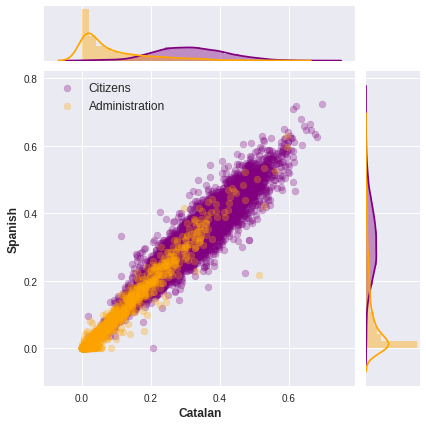

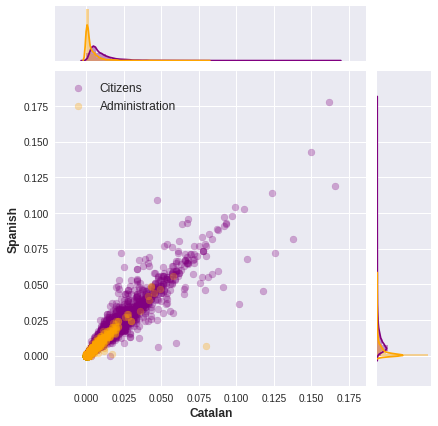

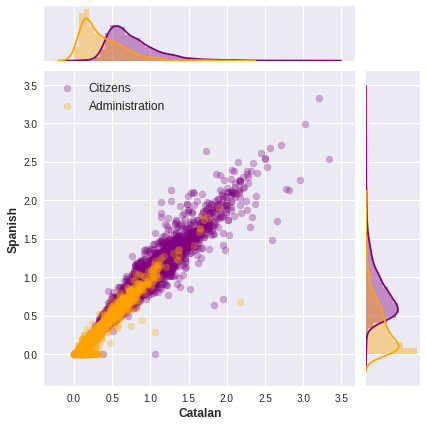

In [47]:
style.use('seaborn')
multivariateGrid('cos_dist_ca', 'cos_dist_es', 'official_dummy_name', df)
style.use('seaborn')
multivariateGrid('eucl_dist_ca', 'eucl_dist_es', 'official_dummy_name', df)
style.use('seaborn')
multivariateGrid('manh_dist_ca', 'manh_dist_es', 'official_dummy_name', df)

## Plot II: Distribution of distances of proposals within a same action

In [50]:
# Plot II: Distribution of distances of proposals within a same action
# delete actions with no 'Ajuntament de Barcelona' as author in any proposals
df_aux = df.groupby('action').filter(lambda df: (df.author_name == 'Ajuntament de Barcelona').any())

# delete actions with only one proposals
df_aux = df.groupby('action').filter(lambda df: (len(df)) > 1)

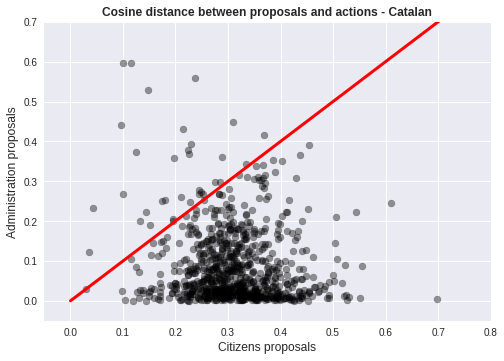

In [61]:
# Cosinus distance
dists_ajt = df_aux.loc[df_aux['official_dummy'] == 1]
dists_ajt = dists_ajt.groupby(['action']).cos_dist_ca.mean().reset_index()
dists_ajt.columns.values[1] = "cos_dist_ajt"

dists_others = df_aux.loc[df_aux['official_dummy'] == 0]
dists_others = dists_others.groupby(['action']).cos_dist_ca.mean().reset_index()
dists_others.columns.values[1] = "cos_dist_others"

data_mean = pd.merge(dists_ajt, dists_others)

# plots
style.use('seaborn')
plt.scatter(data_mean.cos_dist_others, data_mean.cos_dist_ajt, color = 'k', alpha = 0.4)
plt.title("Cosine distance between proposals and actions - Catalan", fontsize = 'large', fontweight='bold')
plt.xlabel("Citizens proposals", fontsize = 'large')
plt.ylabel("Administration proposals", fontsize = 'large')
plt.plot([0,1], [0,1], color = 'red', linewidth = 3)
plt.xlim((-0.05, 0.8))
plt.ylim((-0.05, 0.7))
plt.show()

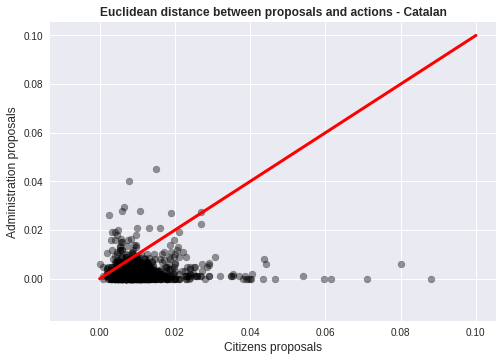

In [58]:
# Euclidean distance
dists_ajt = df_aux.loc[df_aux['official_dummy'] == 1]
dists_ajt = dists_ajt.groupby(['action']).eucl_dist_ca.mean().reset_index()
dists_ajt.columns.values[1] = "eucl_dist_ajt"

dists_others = df_aux.loc[df_aux['official_dummy'] == 0]
dists_others = dists_others.groupby(['action']).eucl_dist_ca.mean().reset_index()
dists_others.columns.values[1] = "eucl_dist_others"

data_mean = pd.merge(dists_ajt, dists_others)

# plots
style.use('seaborn')
plt.scatter(data_mean.eucl_dist_others, data_mean.eucl_dist_ajt, color = 'k', alpha = 0.4)
plt.title("Euclidean distance between proposals and actions - Catalan", fontsize = 'large', fontweight='bold')
plt.xlabel("Citizens proposals", fontsize = 'large')
plt.ylabel("Administration proposals", fontsize = 'large')
plt.plot([0,0.1], [0,0.1], color = 'red', linewidth = 3)
#plt.xlim((-0.05, 0.33))
#plt.ylim((-0.05, 0.33))
plt.show()

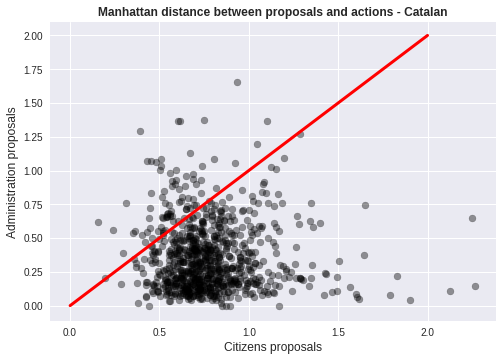

In [60]:
# Manhattan distance
dists_ajt = df_aux.loc[df_aux['official_dummy'] == 1]
dists_ajt = dists_ajt.groupby(['action']).manh_dist_ca.mean().reset_index()
dists_ajt.columns.values[1] = "manh_dist_ajt"

dists_others = df_aux.loc[df_aux['official_dummy'] == 0]
dists_others = dists_others.groupby(['action']).manh_dist_ca.mean().reset_index()
dists_others.columns.values[1] = "manh_dist_others"

data_mean = pd.merge(dists_ajt, dists_others)

# plots
style.use('seaborn')
plt.scatter(data_mean.manh_dist_others, data_mean.manh_dist_ajt, color = 'k', alpha = 0.4)
plt.title("Manhattan distance between proposals and actions - Catalan", fontsize = 'large', fontweight='bold')
plt.xlabel("Citizens proposals", fontsize = 'large')
plt.ylabel("Administration proposals", fontsize = 'large')
plt.plot([0,2], [0,2], color = 'red', linewidth = 3)
#plt.xlim((-0.05, 0.33))
#plt.ylim((-0.05, 0.33))
plt.show()